In [1]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.core.cell_types_cache import ReporterStatus as RS
from allensdk.ephys.feature_extractor import EphysFeatureExtractor
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

ctc = CellTypesCache()
cells = ctc.get_cells()
cell_index = {c['id']: c for c in cells}


In [2]:
data_set = ctc.get_ephys_data(480640846)
sweep_data = data_set.get_sweep(5)

In [3]:
index_range = sweep_data["index_range"]
i = sweep_data["stimulus"] # in A
v = sweep_data["response"] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

(-73.5, -70.0)

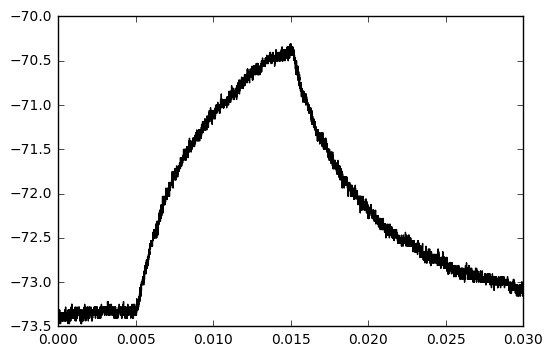

In [4]:
plt.plot(t,v,color = 'black')
plt.xlim(0,.03)
plt.ylim(-73.500,-70.000)

In [5]:
.03*sampling_rate

6000.0

In [25]:
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz

y = v[1000:6001]

area = trapz(y, dx=.001)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=len(y))
print("area =", area)

area = -359.598
area = -1.79835e+09


In [24]:
v

array([-73.40625763, -73.34375   , -73.40625763, ...,   0.        ,
         0.        ,   0.        ], dtype=float32)

In [23]:
y = v[1000:6001] + (v[1000] *-1)
area = trapz(y, dx=.001)
print("area =", area)

area = 6.96435


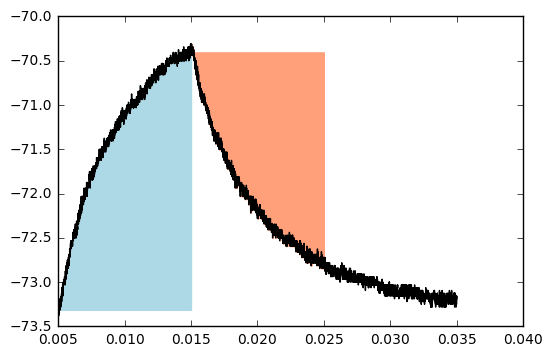

In [7]:
plt.plot(t[1000:7001], v[1000:7001], color = "black")
plt.fill_between(t[1000:3000],v[1000],v[1000:3000], color = 'lightblue')
plt.fill_between(t[3000:5000],v[3000],v[3000:5000], color = 'lightsalmon')
#plt.annot(t[2000], v[3000], "")


(-70.5, -64.5)

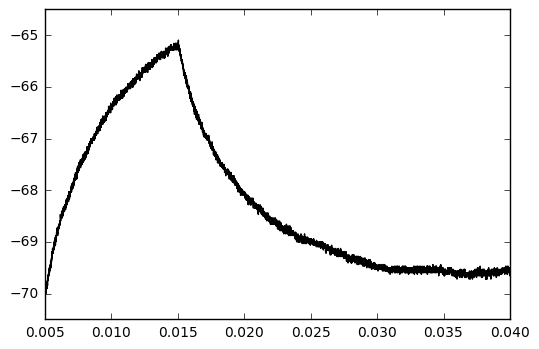

In [75]:
data_set = ctc.get_ephys_data(488450754)
sweep_data = data_set.get_sweep(4)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"] # in A
v = sweep_data["response"] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.plot(t,v,color = 'black')
plt.xlim(0.005,.04)
plt.ylim(-70.5,-64.5)

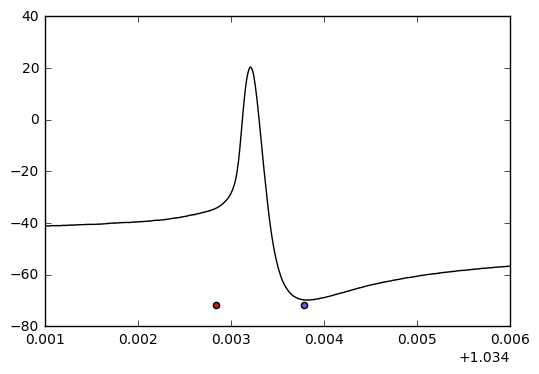

In [49]:
#what about looking at the area under the spike?
#rheobase is sweep 42
#superthreshold is sweep 49
data_set = ctc.get_ephys_data(488450754)
sweep_data = data_set.get_sweep(42)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"] # in A
v = sweep_data["response"] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)
plt.plot(t,v,color = 'black')
plt.xlim(1.035,1.04)
min_v = v.min()

v_level = min_v - 5

plt.scatter(spike_times, np.ones(len(spike_times)) * min_v, c='firebrick')
plt.scatter(trough_times, np.ones(len(trough_times)) * min_v, c='slateblue')

#plt.ylim(-70.5,-64.5)

In [34]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
sweep_ext.process_spikes()


In [48]:
spike_times = sweep_ext.spike_feature("threshold_t")
trough_times = sweep_ext.spike_feature("fast_trough_t")
print (spike_times)

[ 1.036835]


(-70.5, -64.5)

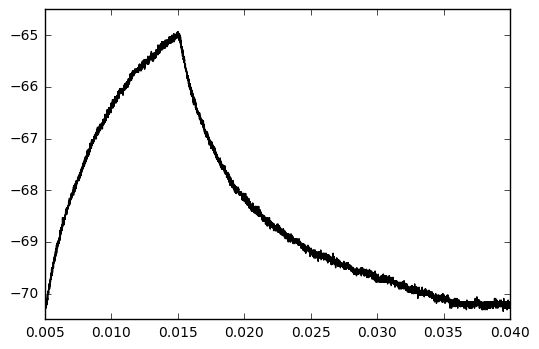

In [74]:
data_set = ctc.get_ephys_data(488450754)
sweep_data = data_set.get_sweep(49)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"] # in A
v = sweep_data["response"] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.plot(t,v,color = 'black')
plt.xlim(0.005,.04)
plt.ylim(-70.5,-64.5)

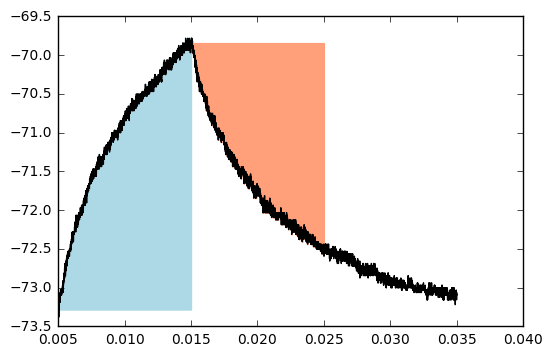

In [70]:
plt.plot(t[1000:7001], v[1000:7001], color = "black")
plt.fill_between(t[1000:3000],v[1000],v[1000:3000], color = 'lightblue')
plt.fill_between(t[3000:5000],v[3000],v[3000:5000], color = 'lightsalmon')
#plt.annot(t[2000], v[3000], "")

In [ ]:
#what happens to the ratio as a function of time since breakin?